In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Importing dataset and necessary libraries

In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [77]:
file=pd.read_csv("/content/drive/MyDrive/Datasets/Crop_Recommendation.csv")
file.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice


#EDA

**Label Encoding**

In [78]:
label_encoder={}
label_encoder["Crop"]=LabelEncoder()
file["Crop"]=label_encoder["Crop"].fit_transform(file["Crop"])
file.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20


**Feature Scaling**

In [79]:
features=file.iloc[:,0:7]
cols=features.columns
scaler=StandardScaler().fit(features)
features=scaler.transform(features)
features=pd.DataFrame(features,columns=cols)

In [80]:
for column in features.columns:
  new=pd.Series(features[column].values,index=file[column]).to_dict()
  file[column]=file[column].map(new)

In [81]:
file.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,1.068797,-0.344551,-0.101688,-0.935587,0.472666,0.043302,1.810361,20
1,0.933329,0.140616,-0.141185,-0.759646,0.397051,0.734873,2.242058,20
2,0.255986,0.049647,-0.081939,-0.515898,0.486954,1.771510,2.921066,20
3,0.635298,-0.556811,-0.160933,0.172807,0.389805,0.660308,2.537048,20
4,0.743673,-0.344551,-0.121436,-1.083647,0.454792,1.497868,2.898373,20


**EDA**

In [82]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   float64
 1   Phosphorus   2200 non-null   float64
 2   Potassium    2200 non-null   float64
 3   Temperature  2200 non-null   float64
 4   Humidity     2200 non-null   float64
 5   pH_Value     2200 non-null   float64
 6   Rainfall     2200 non-null   float64
 7   Crop         2200 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 137.6 KB


In [83]:
file.isna().sum()

Nitrogen       0
Phosphorus     0
Potassium      0
Temperature    0
Humidity       0
pH_Value       0
Rainfall       0
Crop           0
dtype: int64

In [84]:
file.describe()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
count,2.200000e+03,2.200000e+03,2.200000e+03,2.200000e+03,2.200000e+03,2.200000e+03,2.200000e+03,2200.000000
mean,-1.033517e-16,5.167584e-17,-5.167584e-17,3.617308e-16,-1.808654e-16,-1.679465e-16,1.291896e-16,10.500000
std,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,6.345731
min,-1.369636e+00,-1.466498e+00,-8.521355e-01,-3.316592e+00,-2.570842e+00,-3.831577e+00,-1.515170e+00,0.000000
25%,-8.006682e-01,-7.690712e-01,-5.559060e-01,-5.623337e-01,-5.040636e-01,-6.433340e-01,-7.081870e-01,5.000000
50%,-3.671690e-01,-7.164472e-02,-3.189225e-01,-3.466729e-03,4.039475e-01,-5.742697e-02,-1.564454e-01,10.500000
75%,9.130086e-01,4.438444e-01,1.680429e-02,5.817982e-01,8.296508e-01,5.869540e-01,3.786243e-01,16.000000
max,2.423483e+00,2.778707e+00,3.097591e+00,3.567190e+00,1.280400e+00,4.478912e+00,3.550701e+00,21.000000


**Removing Outliers**

<Axes: >

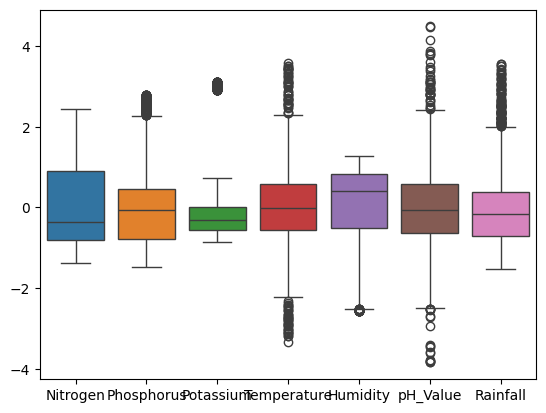

In [85]:
sns.boxplot(file.iloc[:,0:7])

In [86]:
for column in file.iloc[:,0:7]:
  q1=file[column].quantile(0.25)
  q3=file[column].quantile(0.75)
  iqr=q3-q1
  ub=q3+1.5*iqr
  lb=q1-1.5*iqr
  file=file[(file[column] <ub) & (file[column] > lb)]

<Axes: >

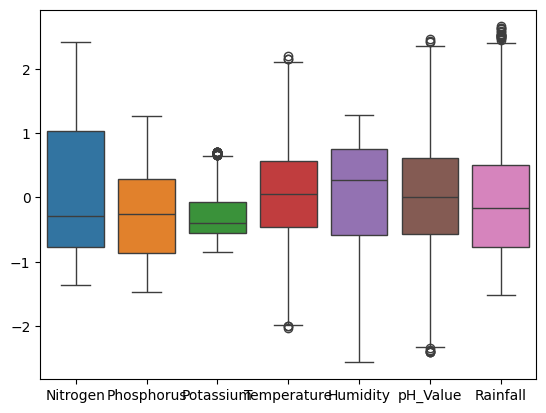

In [87]:
sns.boxplot(file.iloc[:,0:7])

In [88]:
file.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1835 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     1835 non-null   float64
 1   Phosphorus   1835 non-null   float64
 2   Potassium    1835 non-null   float64
 3   Temperature  1835 non-null   float64
 4   Humidity     1835 non-null   float64
 5   pH_Value     1835 non-null   float64
 6   Rainfall     1835 non-null   float64
 7   Crop         1835 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 129.0 KB


<Axes: ylabel='Density'>

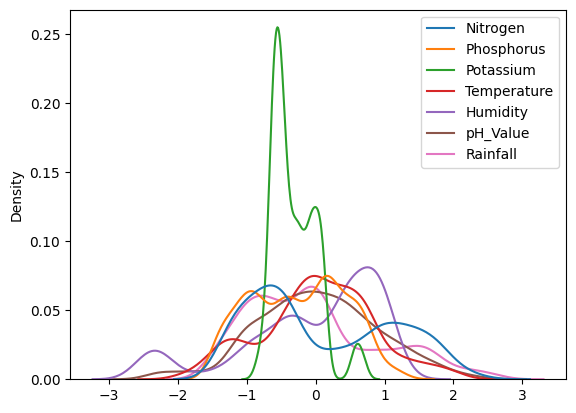

In [89]:
sns.kdeplot(file.iloc[:,0:7])

<Axes: >

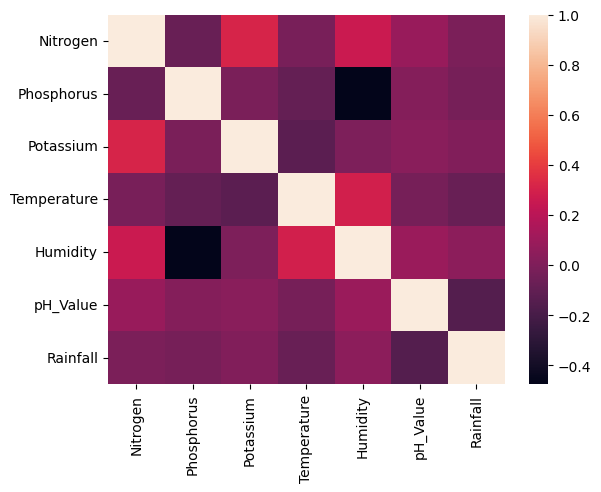

In [90]:
sns.heatmap(data=file.iloc[:,0:7].corr())

# K means clustering

In [111]:
file=file[file["Crop"]<5]
features=file.iloc[:,0:7]
target=file.loc[:,"Crop"]


**Here we set the variables through which we need to identify our clustersc(Basically all the indepedent variables)**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

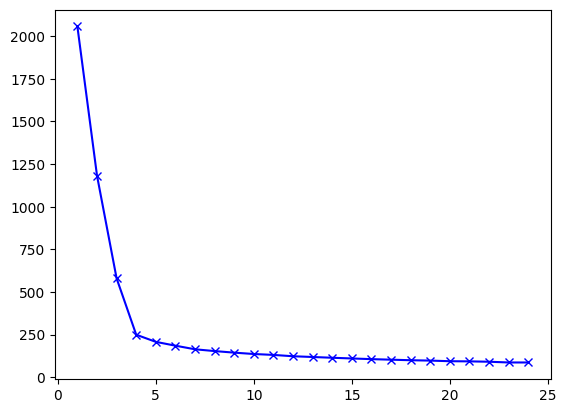

In [112]:
inertia=[]
K=range(1,25)
for k in range(1,25):
  kmeans=KMeans(n_clusters=k,random_state=42)
  kmeans.fit(features)
  inertia.append(kmeans.inertia_)

plt.plot(K,inertia,'bx-')

**Now for k means clustering we need to identify the most optimal value of k(number of clutsers) which can be derived from elbow curve**

**Here we use inertia which is basically the sum of squared errors**

**we plot the inertia for different value of k and get the optimal value of k**

In [113]:
optimal_k=4
kmeans=KMeans(n_clusters=optimal_k,random_state=42)
file["Cluster"]=kmeans.fit_predict(features)+1

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**Here using the optimal value of k we use k means clustering and get the clutsers for all the data**

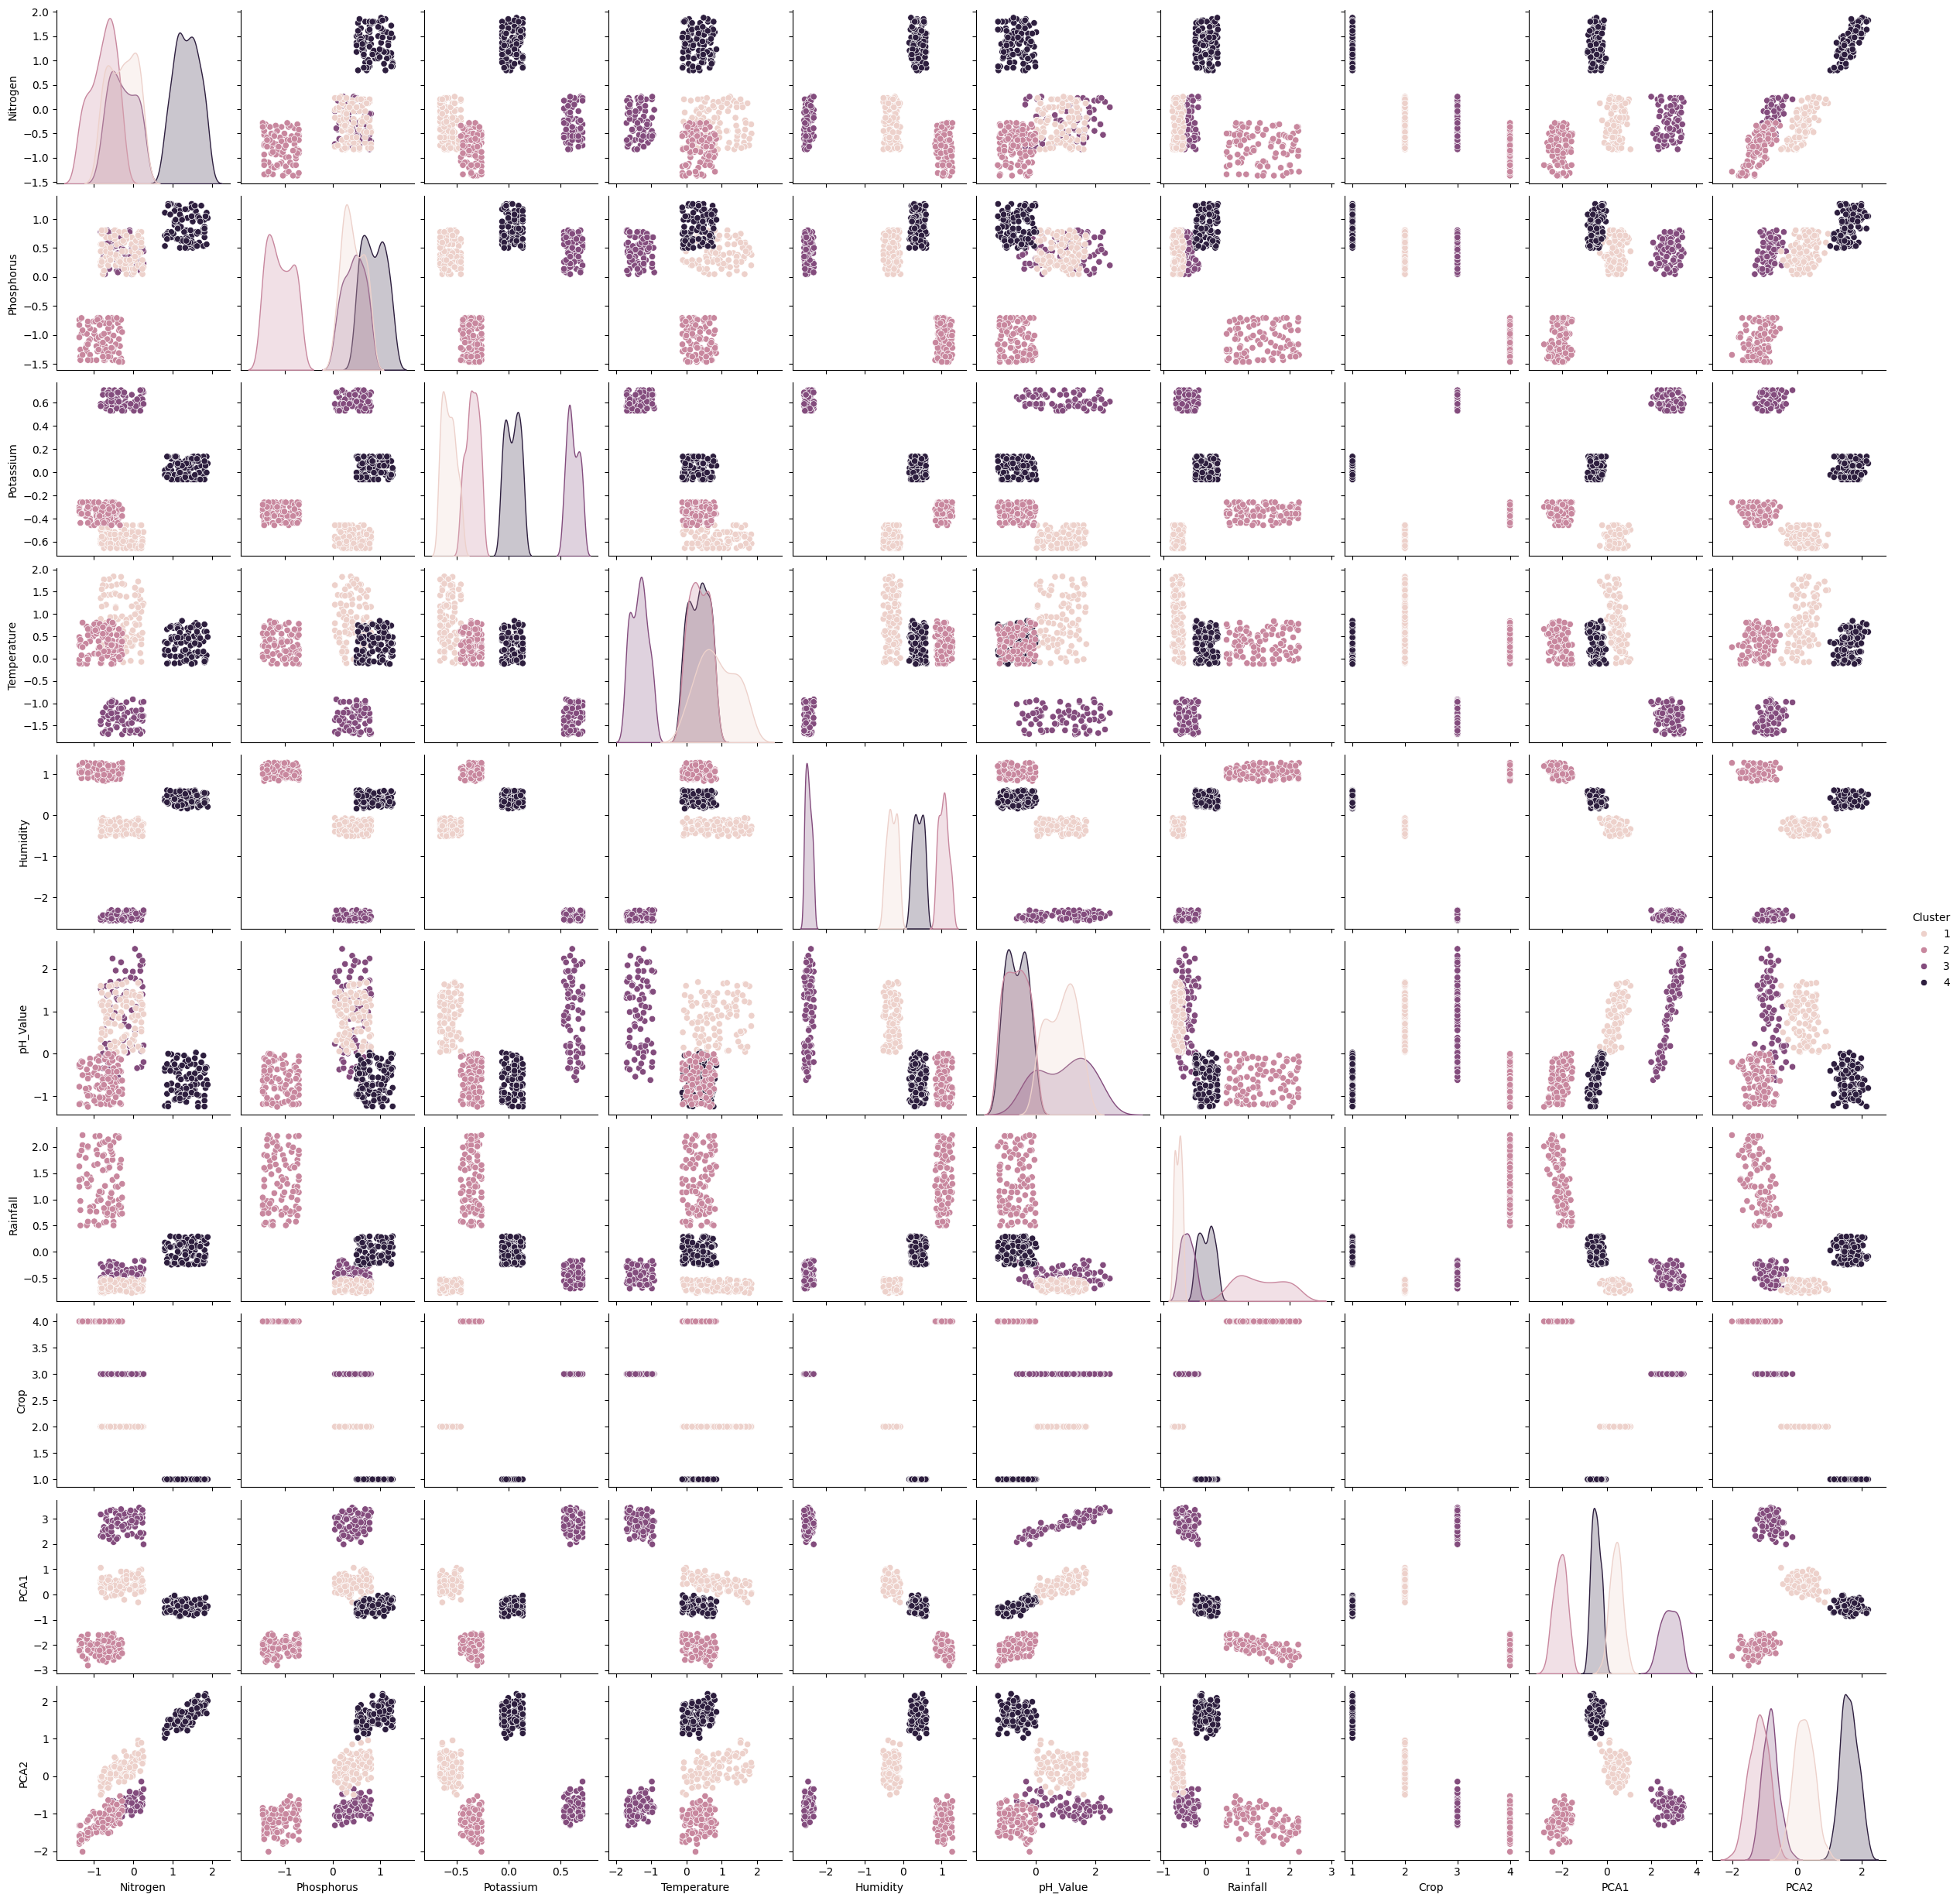

In [114]:
sns.pairplot(file,hue="Cluster")

<Axes: xlabel='PCA1', ylabel='PCA2'>

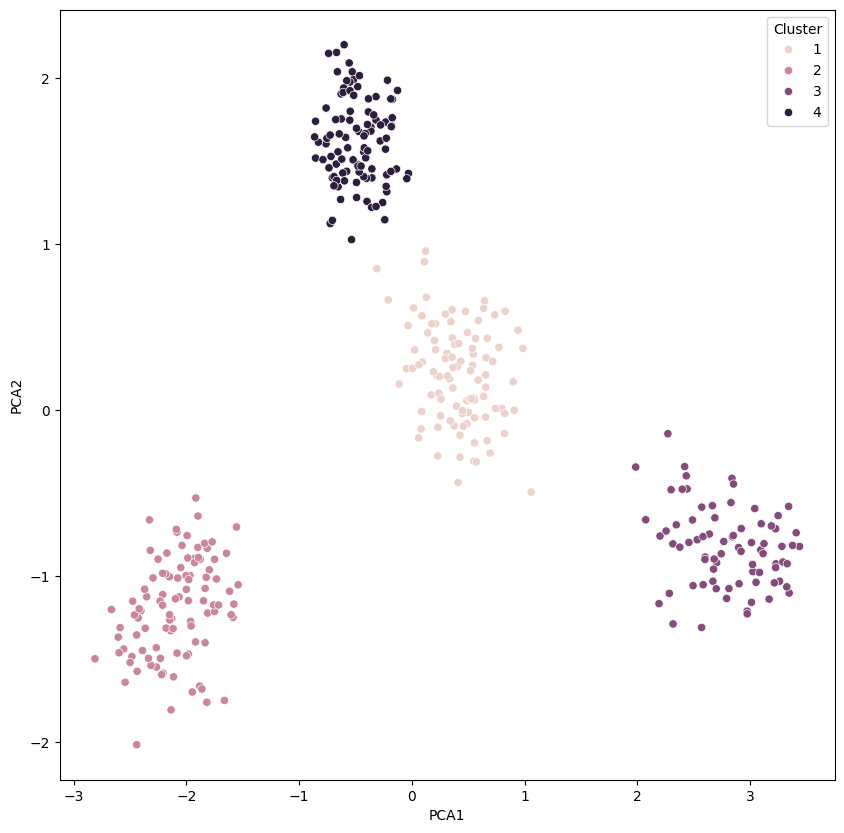

In [115]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
features_pca=pca.fit_transform(features)
file["PCA1"]=features_pca[:,0]
file['PCA2']=features_pca[:,1]
plt.figure(figsize=(10,10))
sns.scatterplot(x='PCA1',y='PCA2',hue='Cluster',data=file)

**Since we have multiple determining variables we use the concept of principal component analysis which helps in dimensionalilt reduction**

**Using PCA we get the same information from 7 different field in 2 fields**

**Hence finally using those PCA we plot a scatter chart getting the desired  cluster in perfect order**

In [116]:
file.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop,Cluster,PCA1,PCA2
200,-0.285888,0.565136,0.569766,-1.697006,-2.448168,1.313733,-0.271402,3,3,3.025698,-0.973290
201,-0.746481,0.565136,0.708006,-1.302816,-2.441745,0.582571,-0.428361,3,3,2.670986,-1.031387
204,-0.394263,0.413522,0.569766,-1.431423,-2.332474,0.883129,-0.440435,3,3,2.704202,-0.919965
205,-0.502637,0.595459,0.648761,-1.020318,-2.519398,-0.620976,-0.196192,3,3,2.074612,-0.660991
206,0.201799,0.504490,0.708006,-0.980114,-2.465258,-0.308145,-0.524162,3,3,2.271561,-0.142325
